# 1. Importing Libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import warnings
import sys
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# Define a customized palette for future plots
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
cmap = ListedColormap(pal)
palette = pal


### Load Data

In [2]:
path = '../DATA USP_BẢN BÁO CÁO PHÂN TÍCH_VÒNG 2.1_ CASE STUDY/[DAZONE 2024] ORIGINAL DATASET.csv'
data = pd.read_csv(path)

In [3]:
df = pd.DataFrame(data)

# 2. Exploratory Data Analysis

This dataset comprises 30 data columns capturing diverse aspects of individual behavior and demographics. These variables can be used for segmentation on customer base into distinct groups based on purchasing habits, preferences, and characteristics. This segmentation allows for targeted marketing strategies tailored to the specific needs and preferences of each segment, thereby enhancing customer engagement and satisfaction. Also, features like recency of interaction, complaints frequency, and payment methods can provide further insights into customer behavior, aiding in refining segmentation strategies and optimizing business operations.

| Feature               | Data Type | Description                                                      |
|:----------------------|:----------|:-----------------------------------------------------------------|
| ID                    | int       | Unique identifier for each record                                |
| Year_Of_Birth         | float     | Year of birth of the individual                                  |
| Academic_Level        | object    | Academic level of the individual                                 |
| Income                | float     | Income of the individual                                         |
| Registration_Time     | object    | Time of registration                                             |
| Recency               | float     | Recency of interaction                                           |
| Liquor                | float     | Purchase frequency of liquor                                     |
| Vegetables            | float     | Purchase frequency of vegetables                                 |
| Pork                  | float     | Purchase frequency of pork                                       |
| Seafood               | float     | Purchase frequency of seafood                                    |
| Candy                 | float     | Purchase frequency of candy                                      |
| Jewellery             | float     | Purchase frequency of jewellery                                  |
| Num_Deals_Purchases   | float     | Number of deals or purchases made                                |
| Num_Web_Purchases     | float     | Number of purchases made via the web                             |
| Num_Catalog_Purchases | float     | Number of purchases made via catalogues                          |
| Num_Store_Purchases   | float     | Number of purchases made in physical stores                      |
| Num_Web_Visits_Month | float     | Number of visits to websites per month                           |
| Promo_30              | float     | Frequency of promotional events with a discount of 30%           |
| Promo_40              | float     | Frequency of promotional events with a discount of 40%           |
| Promo_50              | float     | Frequency of promotional events with a discount of 50%           |
| Promo_10              | float     | Frequency of promotional events with a discount of 10%           |
| Promo_20              | float     | Frequency of promotional events with a discount of 20%           |
| Complain              | float     | Frequency of complaints                                          |
| Gender                | object    | Gender of the individual                                         |
| Phone                 | float     | Frequency of phone usage                                         |
| Phone_Number          | float     | Frequency of phone usage                                         |
| Year_Register         | float     | Year of registration                                             |
| Month_Register        | float     | Month of registration                                            |
| Total_Purchase        | float     | Total purchase made                                              |
| Living_With           | object    | Living arrangement of the individual                             |
| Payment_Method        | object    | Method of payment                                                |


We categorize our data into 4 main subsets, namely 'Customer Information', 'Products', 'Promotion', 'Places'. This categorization divide our dataset into separable parts, which would contribute to later interpretations and customer segmentations.

Customer Information:

- ID
- Year_Of_Birth
- Academic_Level
- Income
- Gender
- Living_With
- Payment_Method
- Phone
- Phone_Number
- Year_Register
- Month_Register
- Total_Purchase
- Registration_Time
- Recency
- Complain

Products:

- Liquor
- Vegetables
- Pork
- Seafood
- Candy
- Jewellery

Promotion:

- Promo_30
- Promo_40
- Promo_50
- Promo_10
- Promo_20

Places:

- Num_Web_Purchases
- Num_Catalog_Purchases
- Num_Store_Purchases
- Num_Web_Visits_Month


In [4]:
df.head(5)

,ID,Year_Of_Birth,Academic_Level,Income,Registration_Time,Recency,Liquor,Vegetables,Pork,Seafood,...,Promo_20,Complain,Gender,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase,Living_With,Payment_Method
0,6815,1982.0,PhD,30396.0,30-04-2023,22.0,16.0,2.0,6.0,0.0,...,0.0,0.0,Male,NaN,8.416733e+10,2023.0,4.0,6.0,Married_1,Cash
1,2567,NaN,NaN,83532.0,26-09-2022,36.0,756.0,NaN,562.0,NaN,...,0.0,0.0,Other,8.431989e+10,NaN,NaN,NaN,15.0,Together_0,NaN
2,6053,1982.0,PhD,68682.0,06-10-2022,56.0,920.0,2.0,505.0,99.0,...,0.0,0.0,Male,8.490853e+10,NaN,2022.0,10.0,24.0,Together_0,Cash
3,1985,2002.0,PhD,63516.0,06-07-2022,30.0,142.0,13.0,114.0,15.0,...,0.0,0.0,Female,8.404168e+10,NaN,2022.0,7.0,16.0,Together_2,Online
4,6860,NaN,PhD,51650.0,11-05-2023,NaN,153.0,5.0,22.0,2.0,...,0.0,0.0,NaN,8.491216e+10,NaN,2023.0,NaN,10.0,Married_1,Mobile


In [5]:
df.describe()

,ID,Year_Of_Birth,Income,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,...,Promo_40,Promo_50,Promo_10,Promo_20,Complain,Phone,Phone_Number,Year_Register,Month_Register,Total_Purchase
count,3069.000000,2832.000000,2782.000000,2804.000000,2807.000000,2810.000000,2806.000000,2813.000000,2840.000000,2792.000000,...,2815.000000,2801.000000,2834.000000,2826.000000,2813.000000,1.561000e+03,1.257000e+03,2084.000000,2100.000000,2833.000000
mean,5496.270446,1987.882768,52489.802301,48.917974,310.807268,28.201779,169.133286,37.570921,27.107746,44.102077,...,-0.641918,0.014638,0.066690,0.014508,0.009243,8.450269e+10,8.449625e+10,2022.020154,6.502381,14.976350
std,2600.610175,4.914424,24436.779418,29.081314,337.387542,39.777338,225.993668,54.811137,41.021721,52.125108,...,0.538184,0.120119,0.249529,0.119594,0.095711,2.831282e+08,2.821344e+08,0.686316,3.485558,7.617011
min,1001.000000,1975.000000,1730.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,8.400005e+10,8.400247e+10,2021.000000,1.000000,0.000000
25%,3251.000000,1985.000000,35790.250000,24.000000,27.000000,3.000000,16.000000,3.000000,1.000000,9.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,8.425969e+10,8.425343e+10,2022.000000,3.000000,8.000000
50%,5555.000000,1988.000000,51844.500000,49.000000,184.000000,10.000000,69.000000,12.000000,9.000000,24.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,8.450524e+10,8.450120e+10,2022.000000,6.000000,15.000000
75%,7753.000000,1991.000000,68592.000000,74.000000,512.000000,34.000000,238.750000,49.000000,34.000000,57.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.474783e+10,8.473833e+10,2022.000000,10.000000,21.000000
max,9997.000000,2002.000000,666666.000000,99.000000,1494.000000,201.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,8.499889e+10,8.499750e+10,2023.000000,12.000000,44.000000


In [6]:
df.nunique() # Number of unique data in each col

ID                       2240
Year_Of_Birth              28
Academic_Level              5
Income                   1974
Registration_Time         663
Recency                   100
Liquor                    776
Vegetables                158
Pork                      558
Seafood                   182
Candy                     177
Jewellery                 213
Num_Deals_Purchases        15
Num_Web_Purchases          15
Num_Catalog_Purchases      14
Num_Store_Purchases        14
Num_Web_Visits_Month       16
Promo_30                    2
Promo_40                    3
Promo_50                    2
Promo_10                    2
Promo_20                    2
Complain                    2
Gender                      3
Phone                    1240
Phone_Number             1000
Year_Register               3
Month_Register             12
Total_Purchase             39
Living_With                23
Payment_Method              4
dtype: int64

In [7]:
df.isnull().sum() # Number of null in each col

ID                          0
Year_Of_Birth             237
Academic_Level            270
Income                    287
Registration_Time         245
Recency                   265
Liquor                    262
Vegetables                259
Pork                      263
Seafood                   256
Candy                     229
Jewellery                 277
Num_Deals_Purchases       228
Num_Web_Purchases         246
Num_Catalog_Purchases     258
Num_Store_Purchases       243
Num_Web_Visits_Month      270
Promo_30                  243
Promo_40                  254
Promo_50                  268
Promo_10                  235
Promo_20                  243
Complain                  256
Gender                    275
Phone                    1508
Phone_Number             1812
Year_Register             985
Month_Register            969
Total_Purchase            236
Living_With               248
Payment_Method            799
dtype: int64

## Data Distribution of different features of the dataset

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

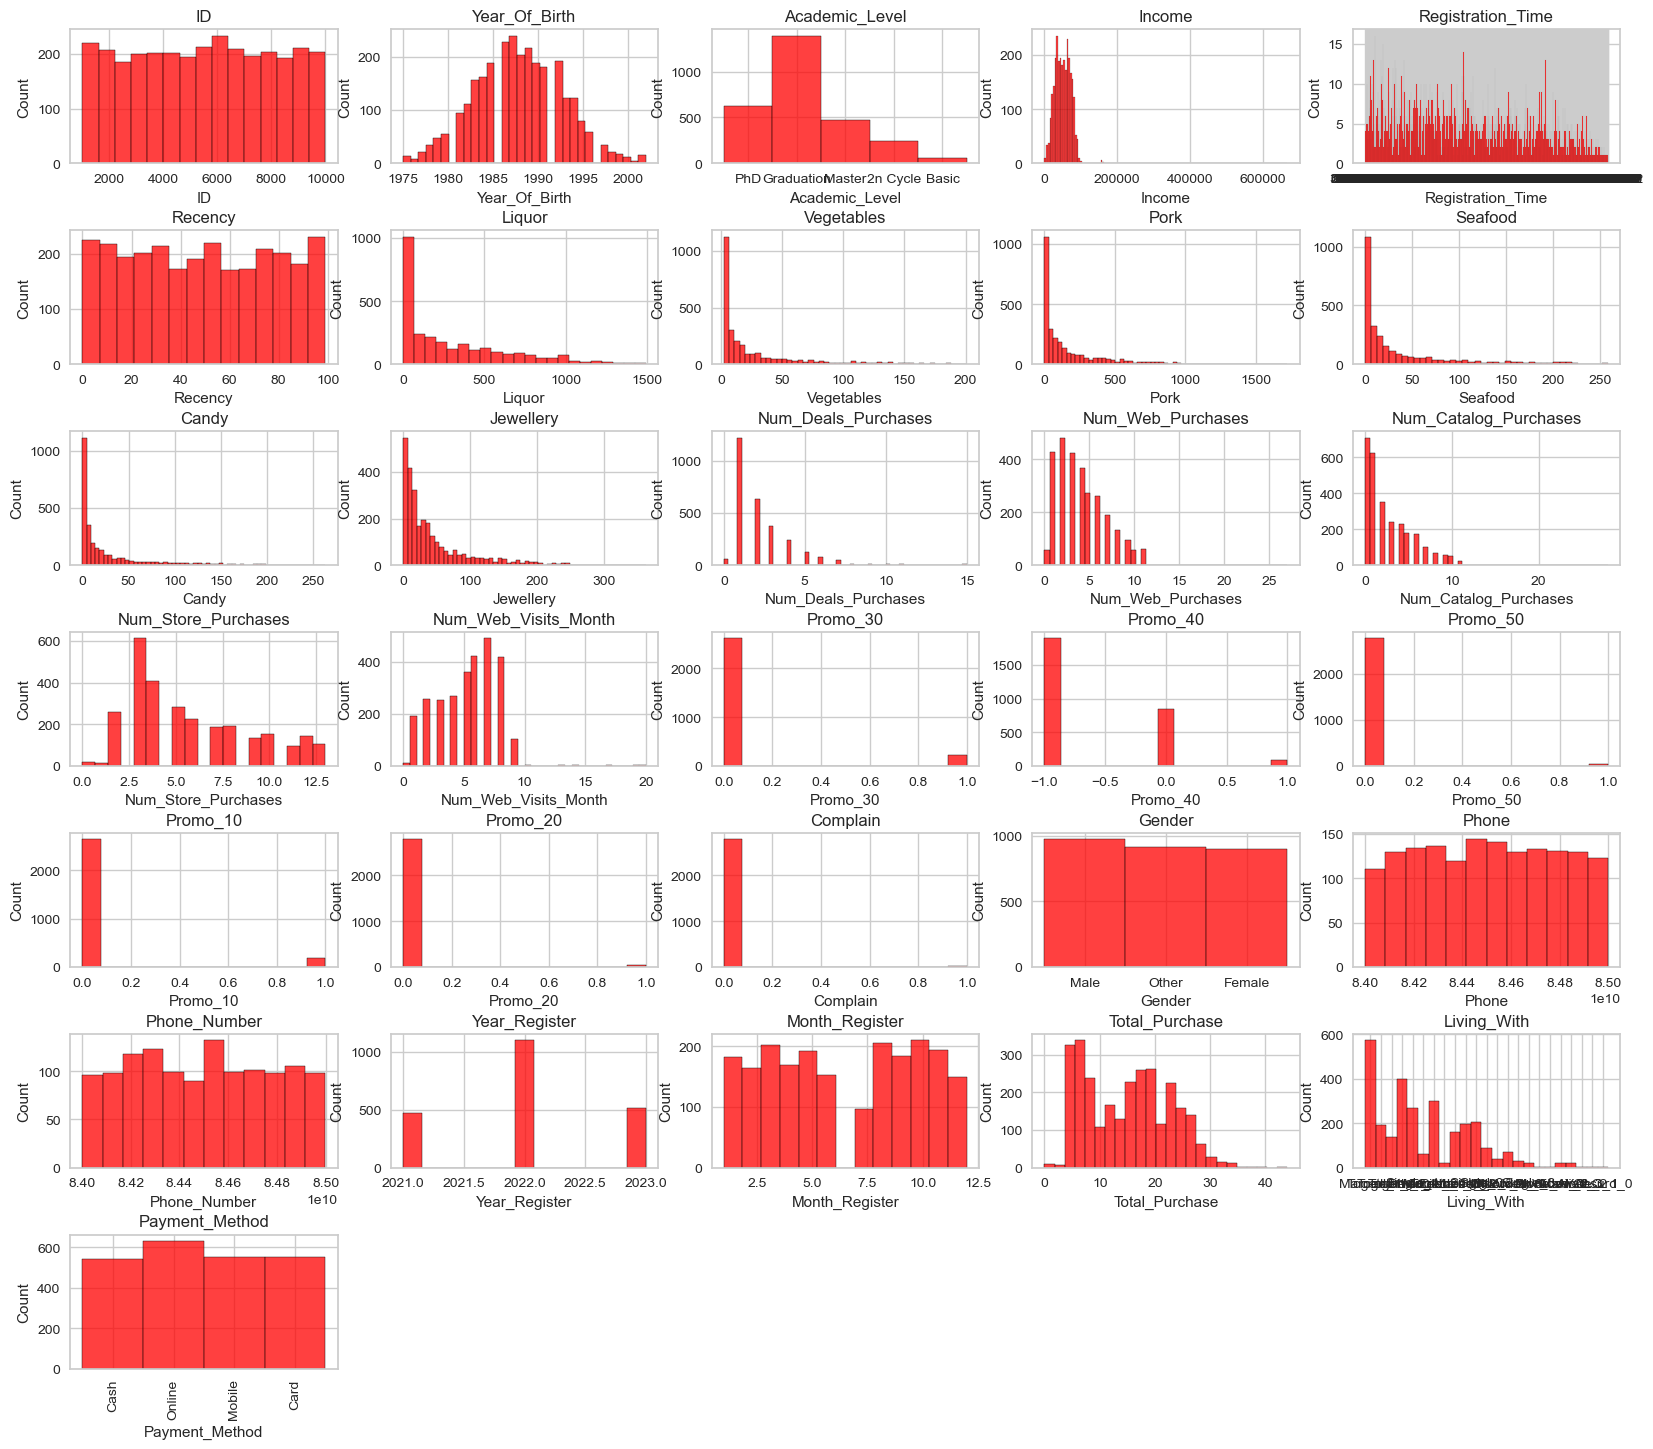

In [8]:
columns = [col for col in df.columns if col != "Unnamed: 0" and col != "Unnamed: 31"]

plt.figure(figsize=(20,20))
for i, col in enumerate(columns):
    plt.subplot(8,5,i+1)
    sns.histplot(data=df, x=col, color='red')
    plt.title(col)
    plt.subplots_adjust(hspace=0.5)

plt.xticks(rotation='vertical')
plt.show()

It can be seen that disregarding categorical and 'labelling' features (such as ID, Phone), most columns from this dataset is skewed to the left.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3069 non-null   int64  
 1   Year_Of_Birth          2832 non-null   float64
 2   Academic_Level         2799 non-null   object 
 3   Income                 2782 non-null   float64
 4   Registration_Time      2824 non-null   object 
 5   Recency                2804 non-null   float64
 6   Liquor                 2807 non-null   float64
 7   Vegetables             2810 non-null   float64
 8   Pork                   2806 non-null   float64
 9   Seafood                2813 non-null   float64
 10  Candy                  2840 non-null   float64
 11  Jewellery              2792 non-null   float64
 12  Num_Deals_Purchases    2841 non-null   float64
 13  Num_Web_Purchases      2823 non-null   float64
 14  Num_Catalog_Purchases  2811 non-null   float64
 15  Num_

From the gained outputs, we can conclude as follows:
- About dataset characteristics:
  1. 'ID' and 'Phone' are 'labelling' columns, since the number of distinct values from those columns equal to the number of rows in the dataset.
  2. There are a significant amount of null value spans across the dataset, especially in 'Year_Register', 'Month_Register' and 'Payment_Method'. Early speculation shows that both 'Year' and 'Month_Register' are values broken down from 'Registration_Time'. Suggested imputation for the missing values in these 2 columns would be to break 'Registration_Time' down and fill the missing values with the corresponding value in the 'Registration_Time'
  3. Object-Type columns: For future processing and to also aid model building using this set of data, Object-type columns will be reorganized and Label Encoded.
- About data distribution in the dataset: Other than the categorical columns and the 'labelling' columns, data distribution across the dataset are considerably skewed. Data Preprocessing would introduce different types of imputation as well as regularization methodologies to reduce the impact of skewed columns to the dataset.

# 3. Data Cleaning

## Merge Row with the same ID together
Assuming this dataset shows the accounts registered by different users of a Viettel sources platform, no customer could have more than exactly 1 ID after registration. That justify the following clone-cleaning with respect to customer ID.

In [10]:
def merge_rows(group):
    combined = group.iloc[0].copy()
    for _, row in group.iterrows():
        for col in group.columns:
            if pd.isna(combined[col]) or combined[col] == '' or combined[col] == 0:
                if not pd.isna(row[col]) and row[col] != '' and row[col] != 0:
                    combined[col] = row[col]
    return combined

merged_df = df.groupby('ID').apply(merge_rows).reset_index(drop=True)
print(merged_df)
df = merged_df

        ID  Year_Of_Birth Academic_Level   Income Registration_Time  Recency  \
0     1001         1994.0     Graduation  61074.0        17-08-2021     37.0   
1     1002         1989.0     Graduation  60093.0        26-06-2022     92.0   
2     1005         1978.0       2n Cycle  79689.0        12-05-2022     65.0   
3     1006         1987.0         Master  41021.0        30-12-2021     12.0   
4     1007         1996.0            PhD  57333.0        22-09-2021     55.0   
...    ...            ...            ...      ...               ...      ...   
2235  9980         1992.0     Graduation  22010.0        30-06-2022     51.0   
2236  9985         1986.0     Graduation  38361.0        27-12-2022     74.0   
2237  9986         1990.0     Graduation  56628.0        21-03-2023     30.0   
2238  9990         1993.0     Graduation  75330.0        04-10-2021     94.0   
2239  9997         1994.0     Graduation  56243.0        30-12-2022     26.0   

      Liquor  Vegetables   Pork  Seafoo

## Concatenation of Phone and Phone_Number





This was made due to 'Phone' and 'Phone_Number' mutually complements each other. Concatenation of these 2 columns makes the data more uniform and clean

In [11]:
df['Phone'] = df['Phone'].fillna('').astype(str)
df['Phone_Number'] = df['Phone_Number'].fillna('').astype(str)
result = df['Phone'] + df['Phone_Number']
result = result.apply(lambda x: int(float(x)) if x != '' else None)
df['Phone'] = result
df = df.drop('Phone_Number', axis = 1)

## Data Cleaning

We drop the na/null values from Recency, as well as converting Registration Time to the respective columns of Year Register and Month Register. This could reduce the computational complexity of the program in general. More over, median imputation was also introduced to Income to further balance out it's distribution across the dataset. The remaining columns such as Foods, Nums and Promo (Except promo 40) is imputed by 0 since the addition of the rows with numeric feature from them correspondingly adds up to the total variables. Therefore, we choose to depict the null/na data as 0.

In [12]:
# Drop rows with missing 'Recency' values
df = df.dropna(subset=['Recency'])

# Convert 'Registration_Time' to datetime
df['Registration_Time'] = pd.to_datetime(df['Registration_Time'], dayfirst=True, errors='coerce')

# Replace value from Year_Reg and Month_Reg with data from Reg_Time
df['Year_Register'] = df['Registration_Time'].dt.year
df['Month_Register'] = df['Registration_Time'].dt.month

# Fill Num_Visit and Income are filled with Median
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Payment_Method'].fillna('Unknown', inplace=True)

# Fill missing values of these cols to 0
impute_0 = [
    'Seafood', 'Candy', 'Jewellery', 'Liquor', 'Pork',
    'Num_Deals_Purchases', 'Num_Web_Purchases', 'Num_Catalog_Purchases', 'Num_Store_Purchases', 'Num_Web_Visits_Month',
    'Promo_20', 'Promo_30', 'Promo_10', 'Promo_50',
    'Complain'
]

df[impute_0] = df[impute_0].fillna(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2238 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2238 non-null   int64         
 1   Year_Of_Birth          2238 non-null   float64       
 2   Academic_Level         2238 non-null   object        
 3   Income                 2238 non-null   float64       
 4   Registration_Time      2238 non-null   datetime64[ns]
 5   Recency                2238 non-null   float64       
 6   Liquor                 2238 non-null   float64       
 7   Vegetables             2238 non-null   float64       
 8   Pork                   2238 non-null   float64       
 9   Seafood                2238 non-null   float64       
 10  Candy                  2238 non-null   float64       
 11  Jewellery              2238 non-null   float64       
 12  Num_Deals_Purchases    2238 non-null   float64       
 13  Num_Web_

In [14]:
df.isnull().sum()

ID                        0
Year_Of_Birth             0
Academic_Level            0
Income                    0
Registration_Time         0
Recency                   0
Liquor                    0
Vegetables                0
Pork                      0
Seafood                   0
Candy                     0
Jewellery                 0
Num_Deals_Purchases       0
Num_Web_Purchases         0
Num_Catalog_Purchases     0
Num_Store_Purchases       0
Num_Web_Visits_Month      0
Promo_30                  0
Promo_40                 31
Promo_50                  0
Promo_10                  0
Promo_20                  0
Complain                  0
Gender                    0
Phone                     0
Year_Register             0
Month_Register            0
Total_Purchase            0
Living_With               0
Payment_Method            0
dtype: int64

In [15]:
df.to_csv("[DAZONE 2024][DATA USP] Data_Cleaned.csv")

# 4. Data Preprocessing (Label Encoding Categorical Cols)

In this step, after re-categorize Object-type data to reduce redundancy in the original division of classes, we use Label Encoding label the data, essentially converting all columns datatype to int.
The conversion is performed as below

### Object_Type Data Reorganization

In [16]:
data = pd.read_csv("../DATA USP_BẢN BÁO CÁO PHÂN TÍCH_VÒNG 2.1_ CASE STUDY/[DAZONE 2024][DATA USP] Data_Cleaned.csv")

In [17]:
Marital_Status = {
    'Unidentified': ['Absurd_0', 'YOLO_1'],
    'Married': ['Married_0', 'Married_1', 'Married_2', 'Married_3', 'Together_0', 'Together_1', 'Together_2', 'Together_3'],
    'Single': ['Alone_1', 'Alone_2', 'Divorced_0', 'Divorced_1', 'Divorced_2', 'Divorced_3', 'Single_0', 'Single_1', 'Single_2', 'Single_3', 'Widow_0', 'Widow_1', 'Widow_2']
}

Academic_Level = {
    'Undergraduate': ['Basic'],
    'Graduate': ['Graduation'],
    'Post Graduate': ['2n Cycle', 'Master', 'PhD']
}

label_to_marital_status = {}
for status, labels in Marital_Status.items():
    for label in labels:
        label_to_marital_status[label] = status

label_to_academic_level = {}
for level, labels in Academic_Level.items():
    for label in labels:
        label_to_academic_level[label] = level

data['Marital_Status'] = data['Living_With'].map(label_to_marital_status)
data['Academic_Level'] = data['Academic_Level'].map(label_to_academic_level)
data = data.drop(columns=['Living_With'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2238 non-null   int64  
 1   ID                     2238 non-null   int64  
 2   Year_Of_Birth          2238 non-null   float64
 3   Academic_Level         2238 non-null   object 
 4   Income                 2238 non-null   float64
 5   Registration_Time      2238 non-null   object 
 6   Recency                2238 non-null   float64
 7   Liquor                 2238 non-null   float64
 8   Vegetables             2238 non-null   float64
 9   Pork                   2238 non-null   float64
 10  Seafood                2238 non-null   float64
 11  Candy                  2238 non-null   float64
 12  Jewellery              2238 non-null   float64
 13  Num_Deals_Purchases    2238 non-null   float64
 14  Num_Web_Purchases      2238 non-null   float64
 15  Num_

### Labeling new data

In [18]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('Registration_Time')

encoder = LabelEncoder()

label_encodings = {}
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
    label_encodings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, encoding in label_encodings.items():
    print(f"Column: {col}")
    for label, encoded in encoding.items():
        print(f"  {label}: {encoded}")
    print()

Column: Academic_Level
  Graduate: 0
  Post Graduate: 1
  Undergraduate: 2

Column: Gender
  Female: 0
  Male: 1
  Other: 2

Column: Payment_Method
  Card: 0
  Cash: 1
  Mobile: 2
  Online: 3
  Unknown: 4

Column: Marital_Status
  Married: 0
  Single: 1
  Unidentified: 2



# 5. Random Forest Model to determine a good number for 'Promo_40'

In [19]:
# Replace -1 to nan
data['Promo_40'].replace(-1, np.nan, inplace=True)

# Split the data into training set and prediction set and drop column Register_Time
train_data = data[data['Promo_40'].notna()].drop('Registration_Time', axis=1)
predict_data = data[data['Promo_40'].isna()].drop('Registration_Time', axis=1)

# Divide the training set into input X and output y
X = train_data.drop('Promo_40', axis=1)
y = train_data['Promo_40']

# Divide the training set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Check the model's accuracy
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Predict the value for the prediction set
predict_data['Promo_40'] = model.predict(predict_data.drop('Promo_40', axis=1))

# Combine the training set and the prediction set
new_data = pd.concat([train_data, predict_data])

Accuracy:  1.0


In [20]:
new_data.isnull().sum()

Unnamed: 0               0
ID                       0
Year_Of_Birth            0
Academic_Level           0
Income                   0
Recency                  0
Liquor                   0
Vegetables               0
Pork                     0
Seafood                  0
Candy                    0
Jewellery                0
Num_Deals_Purchases      0
Num_Web_Purchases        0
Num_Catalog_Purchases    0
Num_Store_Purchases      0
Num_Web_Visits_Month     0
Promo_30                 0
Promo_40                 0
Promo_50                 0
Promo_10                 0
Promo_20                 0
Complain                 0
Gender                   0
Phone                    0
Year_Register            0
Month_Register           0
Total_Purchase           0
Payment_Method           0
Marital_Status           0
dtype: int64

In [21]:
#Add register time in data to new data
new_data['Registration_Time'] = data['Registration_Time']
new_data.drop(['Unnamed: 0'], axis=1, inplace=True)
new_data.head()

,ID,Year_Of_Birth,Academic_Level,Income,Recency,Liquor,Vegetables,Pork,Seafood,Candy,...,Promo_20,Complain,Gender,Phone,Year_Register,Month_Register,Total_Purchase,Payment_Method,Marital_Status,Registration_Time
1,1002,1989.0,0,60093.0,92.0,503.0,14.0,109.0,16.0,6.0,...,0.0,0.0,1,84948328015,2022,6,21.0,2,0,2022-06-26
3,1006,1987.0,1,41021.0,12.0,15.0,9.0,9.0,6.0,16.0,...,0.0,0.0,0,84940063568,2021,12,7.0,3,0,2021-12-30
7,1018,1990.0,0,31814.0,73.0,36.0,5.0,20.0,4.0,1.0,...,0.0,0.0,0,84371737903,2022,2,7.0,4,0,2022-02-09
10,1035,1983.0,1,50150.0,32.0,136.0,48.0,92.0,65.0,61.0,...,0.0,0.0,1,84836306098,2022,6,16.0,2,0,2022-06-20
11,1036,1987.0,1,46106.0,84.0,31.0,2.0,8.0,2.0,0.0,...,0.0,0.0,2,84598195085,2023,5,5.0,3,0,2023-05-11


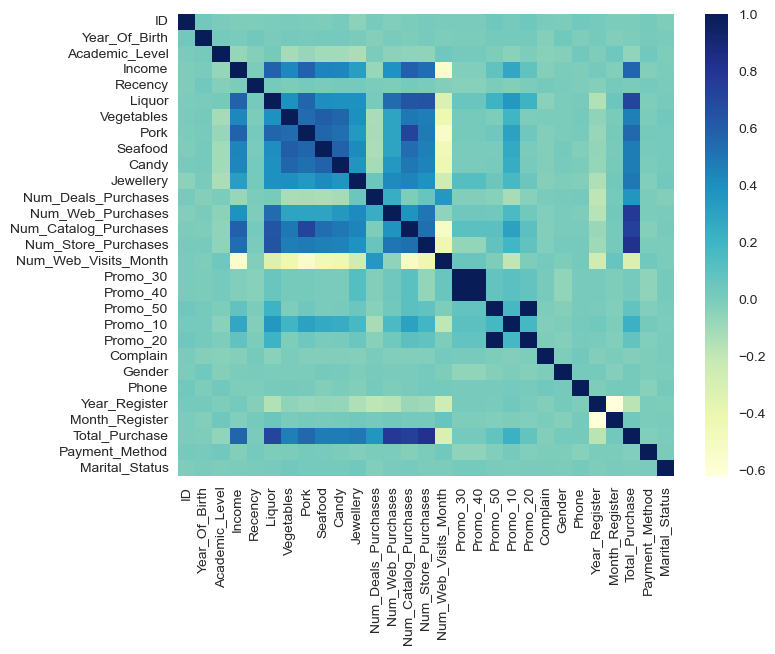

In [22]:
#draw heatmap to find relationship between columns
numeric_data = new_data.select_dtypes(include=[float,int])
corr = numeric_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='YlGnBu')
plt.title=('Correlation Heatmap')
plt.show()

In [23]:
# Create column total spending
new_data['Total_Spending'] = new_data['Liquor'] + new_data['Vegetables'] + new_data['Pork'] + new_data['Seafood'] + new_data['Candy'] + new_data['Jewellery']
new_data.head()

,ID,Year_Of_Birth,Academic_Level,Income,Recency,Liquor,Vegetables,Pork,Seafood,Candy,...,Complain,Gender,Phone,Year_Register,Month_Register,Total_Purchase,Payment_Method,Marital_Status,Registration_Time,Total_Spending
1,1002,1989.0,0,60093.0,92.0,503.0,14.0,109.0,16.0,6.0,...,0.0,1,84948328015,2022,6,21.0,2,0,2022-06-26,738.0
3,1006,1987.0,1,41021.0,12.0,15.0,9.0,9.0,6.0,16.0,...,0.0,0,84940063568,2021,12,7.0,3,0,2021-12-30,67.0
7,1018,1990.0,0,31814.0,73.0,36.0,5.0,20.0,4.0,1.0,...,0.0,0,84371737903,2022,2,7.0,4,0,2022-02-09,86.0
10,1035,1983.0,1,50150.0,32.0,136.0,48.0,92.0,65.0,61.0,...,0.0,1,84836306098,2022,6,16.0,2,0,2022-06-20,413.0
11,1036,1987.0,1,46106.0,84.0,31.0,2.0,8.0,2.0,0.0,...,0.0,2,84598195085,2023,5,5.0,3,0,2023-05-11,57.0


In [24]:
new_data.dtypes

ID                         int64
Year_Of_Birth            float64
Academic_Level             int32
Income                   float64
Recency                  float64
Liquor                   float64
Vegetables               float64
Pork                     float64
Seafood                  float64
Candy                    float64
Jewellery                float64
Num_Deals_Purchases      float64
Num_Web_Purchases        float64
Num_Catalog_Purchases    float64
Num_Store_Purchases      float64
Num_Web_Visits_Month     float64
Promo_30                 float64
Promo_40                 float64
Promo_50                 float64
Promo_10                 float64
Promo_20                 float64
Complain                 float64
Gender                     int32
Phone                      int64
Year_Register              int64
Month_Register             int64
Total_Purchase           float64
Payment_Method             int32
Marital_Status             int32
Registration_Time         object
Total_Spen

In [25]:
# Check duplicated column ID
new_data.duplicated().sum()

0

### Outlier Clearning for Income, Total_Purchases and Total_Pending.

We used our main method for indicating Outliers as the "Interquartile Range (IQR)", using that method, we were able to determine the outliers from the 3 specified columns as above and clean them accordingly

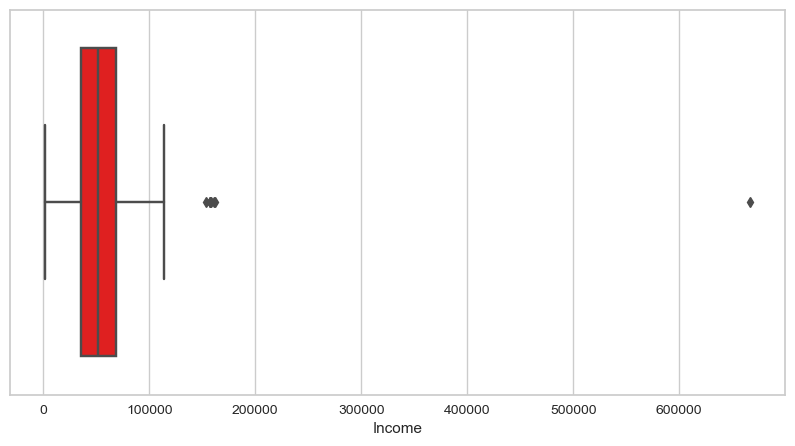

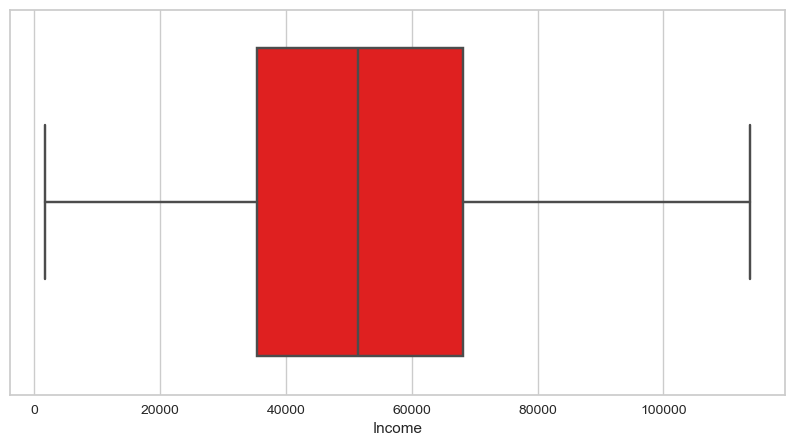

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initial boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=new_data['Income'], color='red')
plt.show()

# Calculate IQR
Q1 = new_data['Income'].quantile(0.25)
Q3 = new_data['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers and remove them
outliers = new_data[(new_data['Income'] < (Q1 - 1.5 * IQR)) | (new_data['Income'] > (Q3 + 1.5 * IQR))]
new_data = new_data[~new_data.index.isin(outliers.index)]

# Visualize 'Income' column after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=new_data['Income'], color='red')
plt.show()


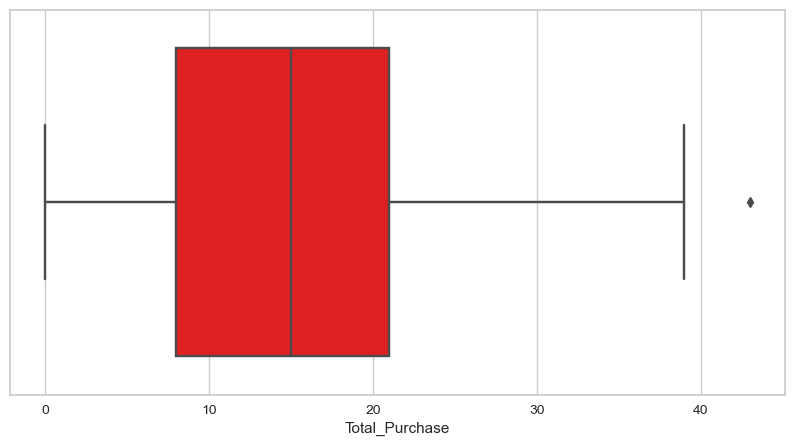

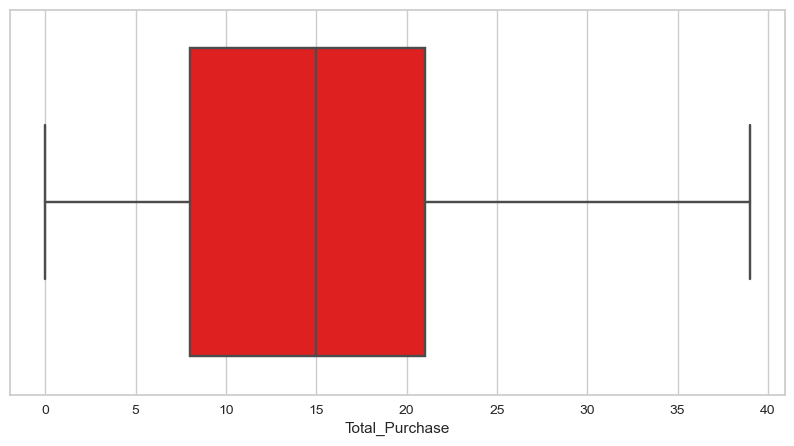

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initial boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=new_data['Total_Purchase'], color='red')
plt.show()

# Calculate IQR
Q1 = new_data['Total_Purchase'].quantile(0.25)
Q3 = new_data['Total_Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers and remove them
outliers = new_data[(new_data['Total_Purchase'] < (Q1 - 1.5 * IQR)) | (new_data['Total_Purchase'] > (Q3 + 1.5 * IQR))]
new_data = new_data[~new_data.index.isin(outliers.index)]

# Visualize 'Total_Purchase' column after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=new_data['Total_Purchase'], color='red')
plt.show()


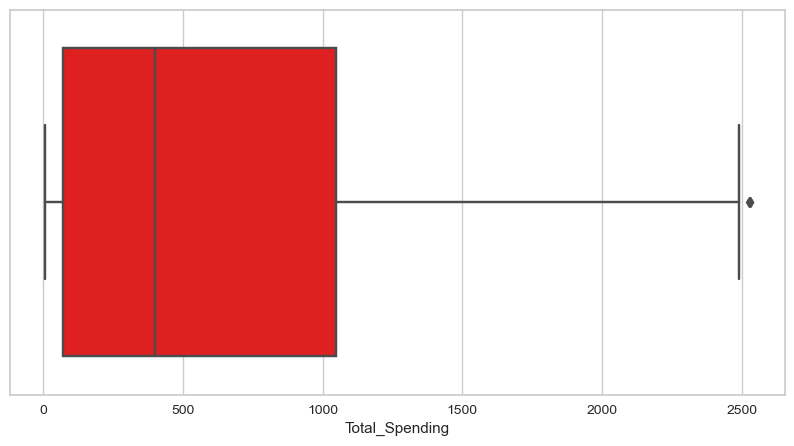

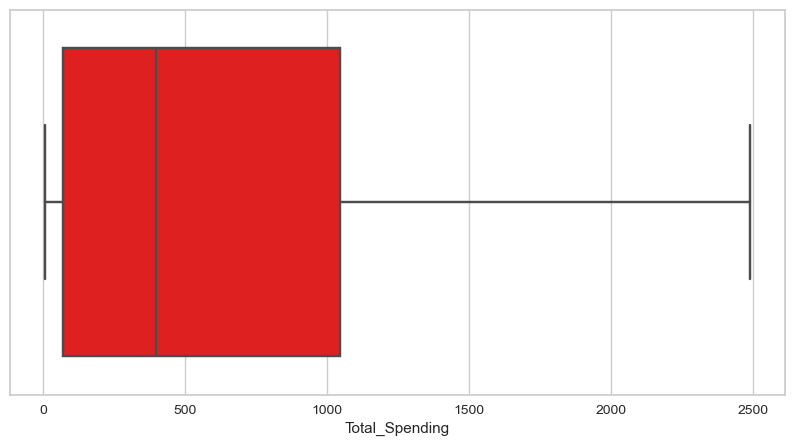

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initial boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=new_data['Total_Spending'], color='red')
plt.show()

# Calculate IQR
Q1 = new_data['Total_Spending'].quantile(0.25)
Q3 = new_data['Total_Spending'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers and remove them
outliers = new_data[(new_data['Total_Spending'] < (Q1 - 1.5 * IQR)) | (new_data['Total_Spending'] > (Q3 + 1.5 * IQR))]
new_data = new_data[~new_data.index.isin(outliers.index)]

# Visualize 'Total_Spending' column after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=new_data['Total_Spending'], color='red')
plt.show()


Overall, it can be seen that the number of outliers per selected features are marginal, thus removal of them can be ensured to not have any extreme effect upon the dataset's nature

In [29]:
#Create 'Age' columns
new_data['Age']= 2023 - data['Year_Of_Birth']
new_data.head()
# Drop column year of birth
new_data = new_data.drop('Year_Of_Birth', axis=1)

In [30]:
new_data.dtypes

ID                         int64
Academic_Level             int32
Income                   float64
Recency                  float64
Liquor                   float64
Vegetables               float64
Pork                     float64
Seafood                  float64
Candy                    float64
Jewellery                float64
Num_Deals_Purchases      float64
Num_Web_Purchases        float64
Num_Catalog_Purchases    float64
Num_Store_Purchases      float64
Num_Web_Visits_Month     float64
Promo_30                 float64
Promo_40                 float64
Promo_50                 float64
Promo_10                 float64
Promo_20                 float64
Complain                 float64
Gender                     int32
Phone                      int64
Year_Register              int64
Month_Register             int64
Total_Purchase           float64
Payment_Method             int32
Marital_Status             int32
Registration_Time         object
Total_Spending           float64
Age       

# 6. K-Means Clustering to determine the number of optimal Customer Classfication

Next, we create a subset of dataframe by dropping the features on deals accepted and promotions. The columns below are dropped due to them being irrelevant factors to determine customer behaviors, and also to ensure an explicit partition on customer purchasing behavior solely based on their purchasing frequency

In [31]:
# data_kmean = data income total spending
data_kmean = new_data.copy()

cols_del = ['ID', 'Phone','Promo_30','Promo_40','Promo_50','Promo_10','Promo_20','Registration_Time','Year_Register','Month_Register','Marital_Status' ]
data_kmean = data_kmean.drop(cols_del, axis=1)
#Scaling all data using StandardScaler() for uniformity
scaler = StandardScaler()
scaler.fit(data_kmean)
scaled_data = pd.DataFrame(scaler.transform(data_kmean),columns= data_kmean.columns )
print("All features are now scaled")

All features are now scaled


In [32]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_data.head()

Dataframe to be used for further modelling:


,Academic_Level,Income,Recency,Liquor,Vegetables,Pork,Seafood,Candy,Jewellery,Num_Deals_Purchases,Num_Web_Purchases,Num_Catalog_Purchases,Num_Store_Purchases,Num_Web_Visits_Month,Complain,Gender,Total_Purchase,Payment_Method,Total_Spending,Age
0,-0.953639,0.412716,1.479936,0.590205,-0.359792,-0.254132,-0.395223,-0.511126,0.877694,-0.167799,1.045070,-0.22671,1.295062,0.274874,-0.09759,-0.005578,0.810367,-0.028388,0.221241,-0.215519
1,0.877941,-0.515620,-1.284408,-0.864498,-0.485933,-0.718168,-0.578058,-0.268024,-0.615733,-0.167799,-0.756886,-0.95651,-0.866426,0.274874,-0.09759,-1.247189,-1.032069,0.681640,-0.901998,0.185941
2,-0.953639,-0.963774,0.823404,-0.801898,-0.586846,-0.667124,-0.614625,-0.632677,-0.462561,-0.167799,-0.756886,-0.95651,-0.866426,1.518511,-0.09759,-1.247189,-1.032069,1.391668,-0.870192,-0.416249
3,0.877941,-0.071263,-0.593322,-0.503803,0.497969,-0.333018,0.500669,0.825935,-0.634879,-0.167799,0.324287,-0.22671,0.368710,-0.139672,-0.09759,-0.005578,0.152354,-0.028388,-0.322802,0.988862
4,0.877941,-0.268106,1.203501,-0.816803,-0.662531,-0.722809,-0.651192,-0.656987,-0.577440,-0.700641,-1.117277,-0.59161,-1.175210,0.274874,-0.09759,1.236034,-1.295274,0.681640,-0.918738,0.185941


### Dimensionality Reduction
We used PCA to reduce the dimensionality of the dataset features to 3 principal components, and visualize from then to see a distribution of data on a 3D plane

In [33]:
#Initiating PCA to reduce dimentions aka features to 3
np.random.seed(8)
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2226.0,-1.085285e-16,2.751654,-5.033448,-2.604239,-0.608593,2.415640,7.168255
col2,2226.0,-6.384032e-17,1.355140,-4.126770,-0.927984,-0.278153,0.777388,6.011781
col3,2226.0,-2.553613e-17,1.059260,-2.911957,-0.819076,0.044875,0.849409,4.672424


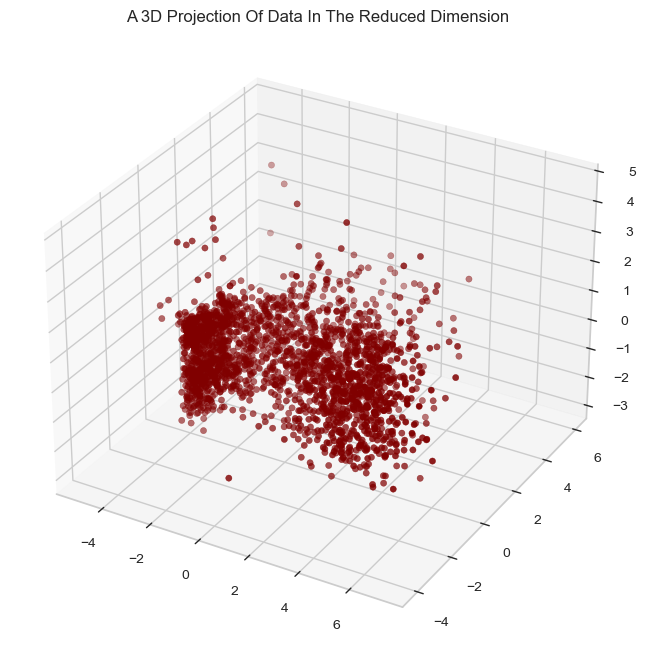

In [34]:
np.random.seed(8)
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


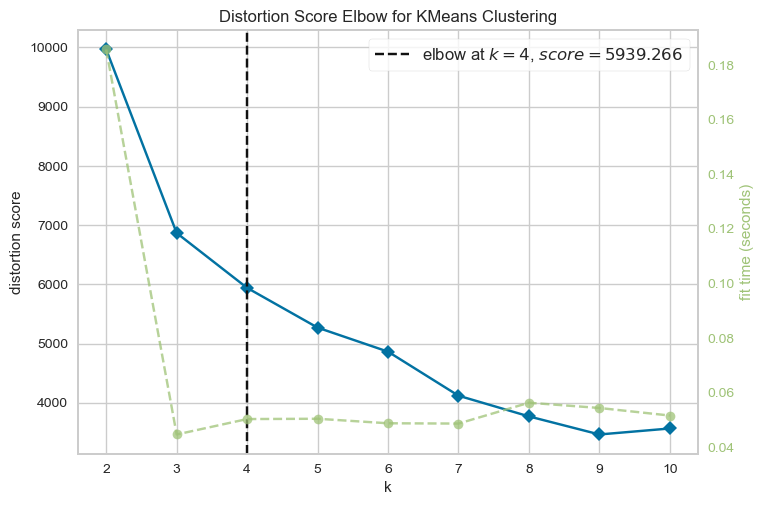

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
kmeans = KMeans(random_state=0)
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

We decided to use the Elbow Method in this document, since it's the most prevalent technique to use in K-Means Clustering to determine the optimal number of clusters for segmentation. It can be referred from the chart above that stabilization was reached at k=4, thus, it would be used as our resulted clustering for this problem.

In [36]:
np.random.seed(8)
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
new_data["Clusters"]= yhat_AC

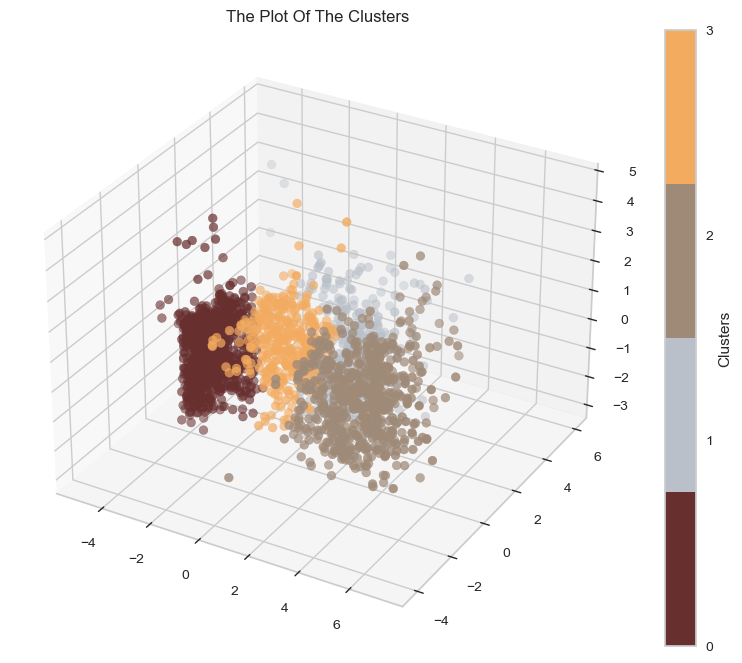

In [37]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters colored using the defined colormap
sc = ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Clusters')
cbar.set_ticks(range(len(pal)))  # Set tick positions
cbar.set_ticklabels(range(len(pal)))  # Set tick labels to match cluster indices

ax.set_title("The Plot Of The Clusters")
plt.show()


It can be seen that our theoretical segmentation of data integrates seamlessly with the dataset and the K-Means Clustering Model, as 4 clusters are very clearly distinguishable after K-Means Clustering application from the 3D representation above.

# 7. Customer Profile Analysis and Comparison to Different relevant datatypes in the dataset

### Customer segmentation by 4 clusters, with respect to their Income - Spending correlation

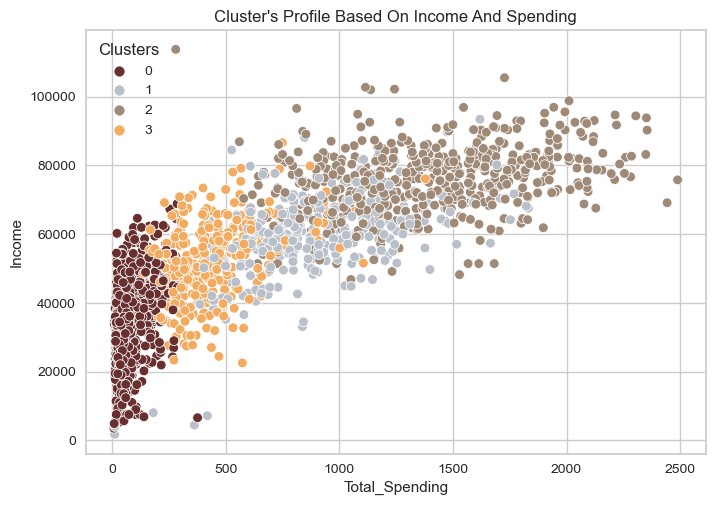

In [38]:
# Scatter plot based on income and spending with clusters colored using the defined colormap
pl = sns.scatterplot(data=new_data, x="Total_Spending", y="Income", hue="Clusters", palette=pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend(title='Clusters')
plt.show()

As can be seen from the chart above, our list of customers can be segmented into 4 different groups based on the most fundamental criteria when it comes to customer insights: 'Spending'. This segmentation allows us to better understand and cater to the needs of each customer group.

1. **Low Spenders**:
   - **Characteristics**: These customers have the lowest total spending among all segments. They typically make infrequent purchases and tend to spend less per transaction. They may be budget-conscious, have lower disposable income, or are less engaged with our offerings.
   - **Strategies**: To increase their spending, we can offer targeted promotions, loyalty programs, or bundle deals that provide better value.

2. **Moderate Spenders**:
   - **Characteristics**: This group spends more than the low spenders but is still conservative in their overall spending habits. They may purchase regularly but prefer mid-range products or services. They are price-sensitive but can be swayed by value propositions.
   - **Strategies**: We can focus on cross-selling and upselling to this group by highlighting mid-range and premium products that offer enhanced benefits or quality.

3. **High Spenders**:
   - **Characteristics**: High spenders are those who consistently spend a significant amount on our products or services. They value quality and are less price-sensitive compared to the first two segments. They are likely more loyal and have a higher level of engagement with our brand.
   - **Strategies**: Personalized marketing, exclusive offers, and VIP programs can be effective in retaining this segment and encouraging even higher spending.

4. **Top Spenders**:
   - **Characteristics**: These customers represent the highest echelon of our spending hierarchy. They make frequent and large purchases. They likely have high disposable incomes and a strong affinity for our brand. They may seek out premium, exclusive, or custom products and services.
   - **Strategies**: We should focus on providing exceptional customer service, personalized experiences, and exclusive access to new products or services. Tailored marketing campaigns that resonate with their lifestyle and preferences can help deepen their loyalty.
deepen their loyalty.

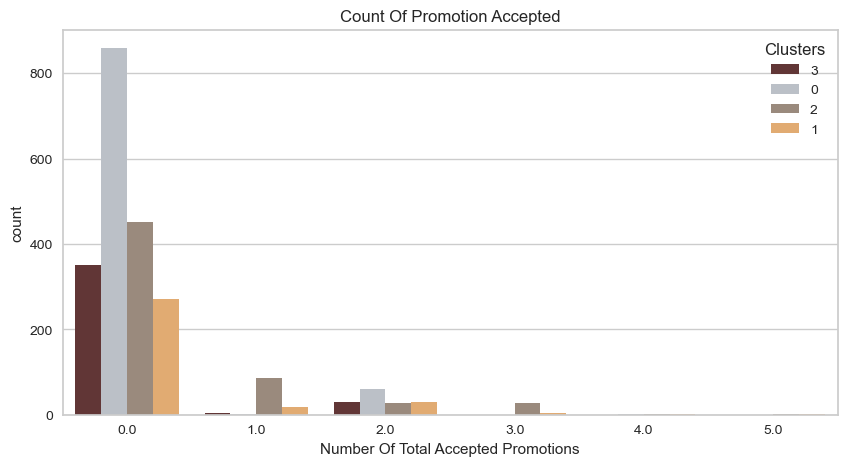

In [39]:
# Calculate Total_Promo
new_data['Clusters'] = new_data['Clusters'].astype(str)
new_data["Total_Promo"] = new_data["Promo_10"] + new_data["Promo_20"] + new_data["Promo_30"] + new_data["Promo_40"] + new_data["Promo_50"]

plt.figure(figsize=(10, 5))
pl = sns.countplot(x=new_data["Total_Promo"], hue=new_data["Clusters"], palette=pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.legend(title='Clusters', loc='best')
plt.show()


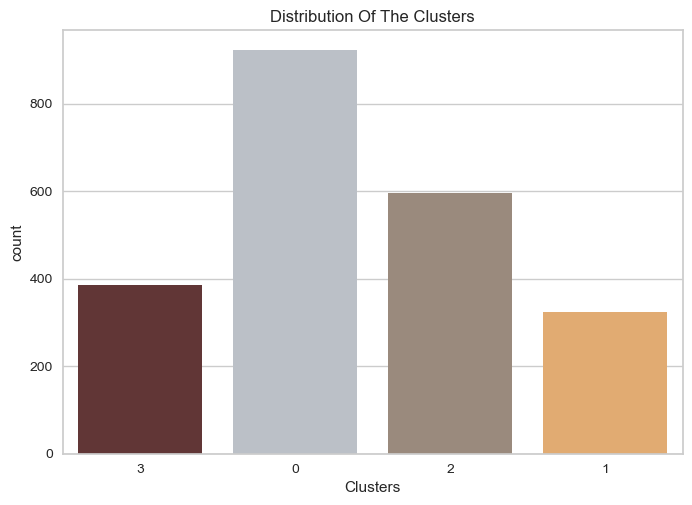

In [40]:
#Plotting countplot of clusters
pl = sns.countplot(x=new_data["Clusters"], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

It is clear that customer from 'Class 0' takes up a significant portion in our dataset, with nearly 1000 people, followed by 'Class 2' with nearly 600 appearances. Class 1 and 3 shares shares an equal number of approximately 360 person per class.

## 7.1. Analysis on Customer Financial Decisions

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

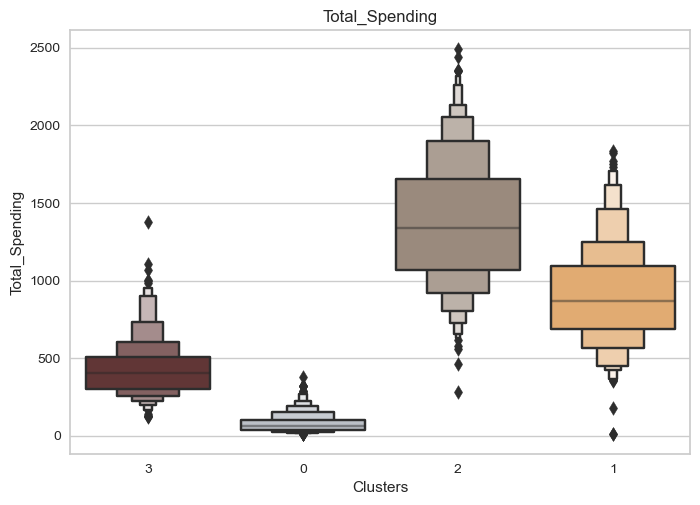

In [41]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=new_data["Total_Spending"],x=new_data["Clusters"], palette= pal)
pl.set_title("Total_Spending")
plt.show()

**Summary**: Spending capacity of each class is ordered by an increasing rate. The mean total spending of each class is as follows:

- **Low Spenders (Class 0)**: Mean Total_Spending ≈ 80
- **Moderate Spenders (Class 1)**: Mean Total_Spending ≈ 400
- **High Spenders (Class 2)**: Mean Total_Spending ≈ 800
- **Top Spenders (Class 3)**: Mean Total_Spending ≈ 1250

This ordering suggests a clear distinction in spending behavior across the identified classes, with higher spending capacity observed in classes with higher indices. Such insights can inform targeted marketing strategies and product offerings tailored to the preferences and purchasing power of each class.


C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

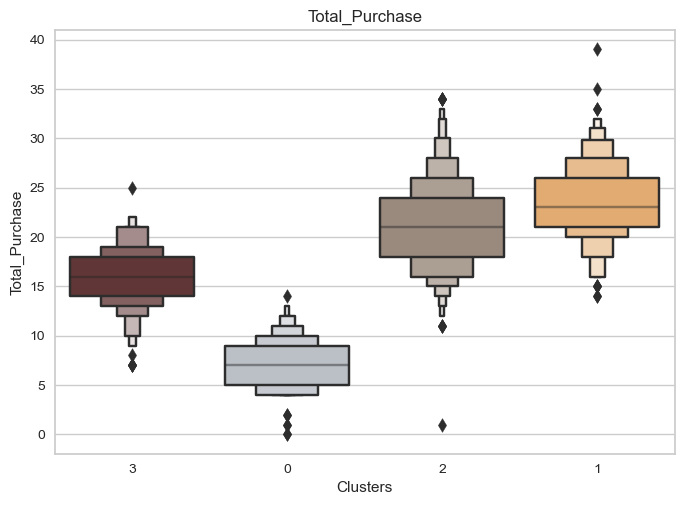

In [42]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=new_data["Total_Purchase"],x=new_data["Clusters"], palette= pal)
pl.set_title("Total_Purchase")
plt.show()

**Summary**: The relationship between the classes based on the 'Total_Purchase' feature is less differentiable compared to the last feature. However, clear segmentation between the classes can still be observed.

- **Low Purchasers (Class 0)**: Mean Total_Purchase ≈ 7
- **Moderate Purchasers (Class 3)**: Mean Total_Purchase ≈ 17
- **High Purchasers (Class 2)**: Mean Total_Purchase ≈ 22
- **Top Purchasers (Class 1)**: Mean Total_Purchase ≈ 23

This segmentation based on total purchases provides insights into the purchasing behavior of different customer segments. It enables the development of targeted marketing strategies and product offerings to better serve the diverse needs of each class.

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

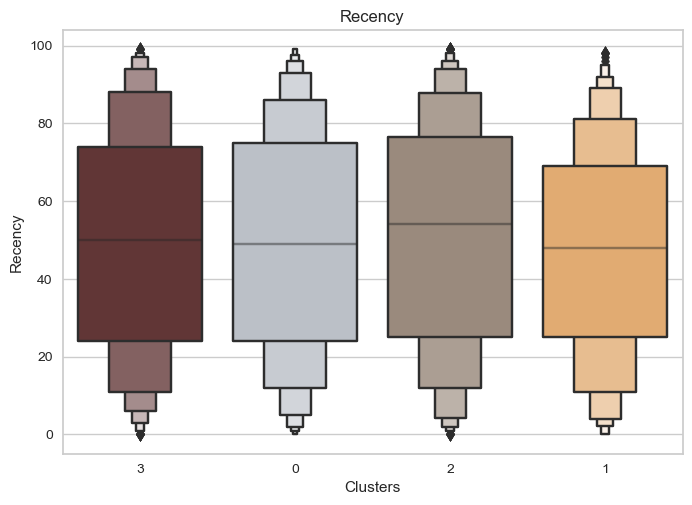

In [43]:
#Plotting Recency
plt.figure()
pl=sns.boxenplot(y=new_data["Recency"],x=new_data["Clusters"], palette= pal)
pl.set_title("Recency")
plt.show()

**Summary**: The relationship between the classes based on the 'Recency' feature is inherenty unclear. Therefore, this won't be a feature used for evaluation between the classes.

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

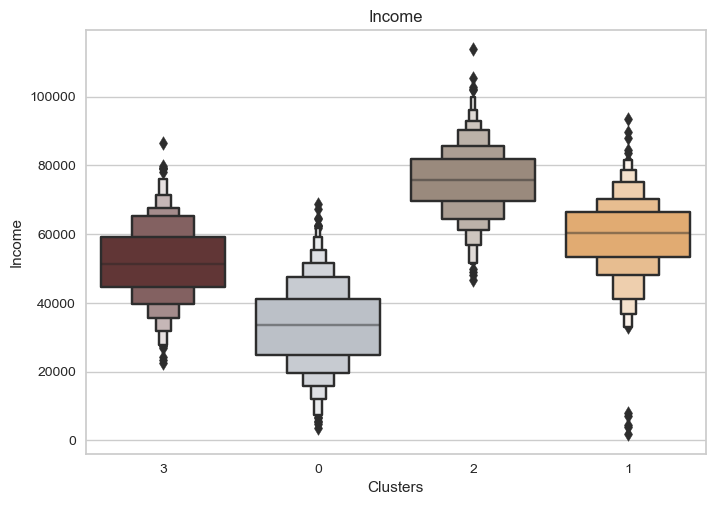

In [44]:
#Plotting the number of Income
plt.figure()
pl=sns.boxenplot(y=new_data["Income"],x=new_data["Clusters"], palette= pal)
pl.set_title("Income")
plt.show()

**Summary**: Segmentation by 'Income' is highly feasible, as demonstrated by the figure above. The average 'Income' for each class is clearly distinguishable from one another, as suggested in the figure above. .

- **Low Income (Class 0)**: Mean Income 32000
- **Moderate Income (Class 3)**: Mean Income ≈ 50000
- **High Income (Class 1)**: Mean Income ≈ 60000
- **Top Income (Class 2)**: Mean Income ≈ 77000

This segmentation based on income levels provides valuable insights into the financial capacity and purchasing power of different customer segments. It enables the development of tailored marketing strategies and product offerings to effectively target eachclass.


## 7.2. Analysis on Customer Choice of Products

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

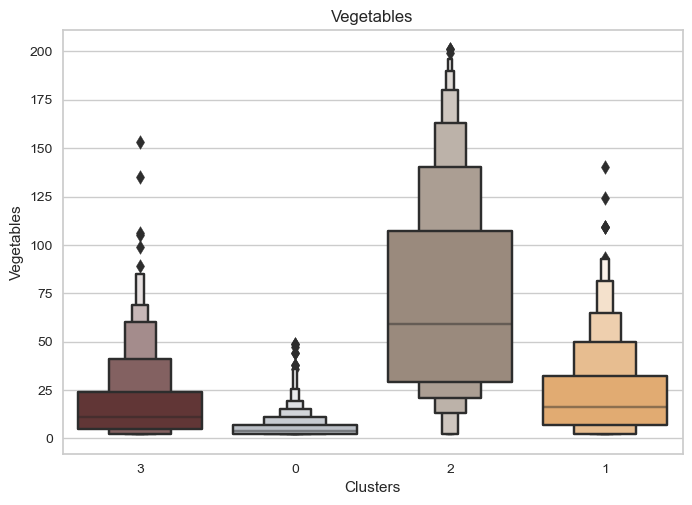

In [45]:
#Plotting the number of Vegetables
plt.figure()
pl=sns.boxenplot(y=new_data["Vegetables"],x=new_data["Clusters"], palette= pal)
pl.set_title("Vegetables")
plt.show()

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

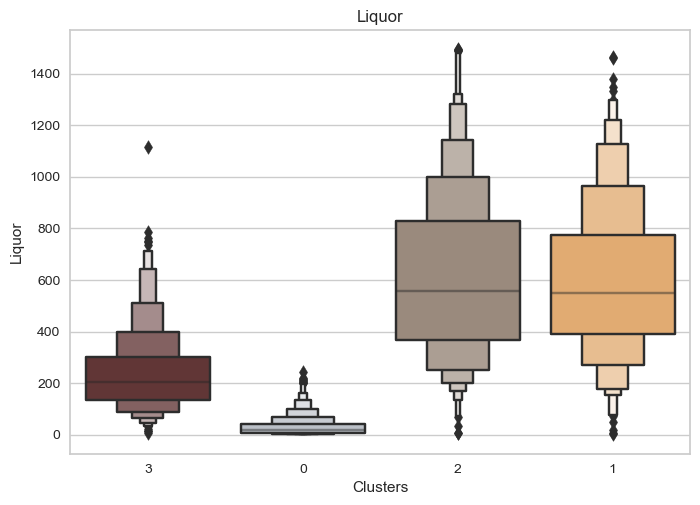

In [46]:
#Plotting the number of Liquor
plt.figure()
pl=sns.boxenplot(y=new_data["Liquor"],x=new_data["Clusters"], palette= pal)
pl.set_title("Liquor")
plt.show()

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

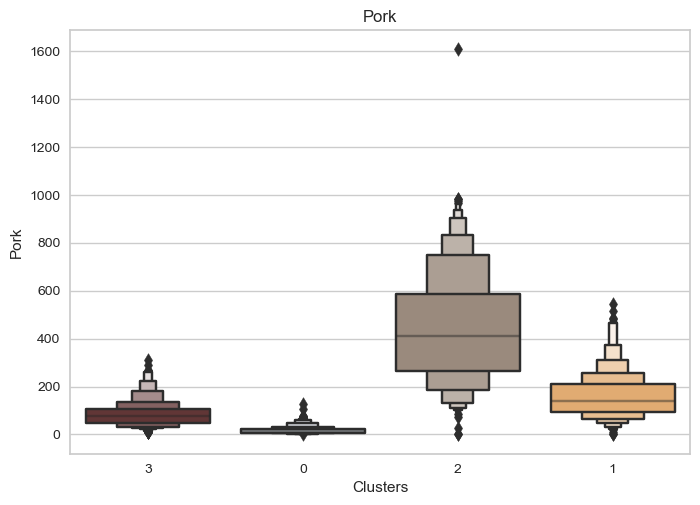

In [47]:
#Plotting Pork
plt.figure()
pl=sns.boxenplot(y=new_data["Pork"],x=new_data["Clusters"], palette= pal)
pl.set_title("Pork")
plt.show()

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

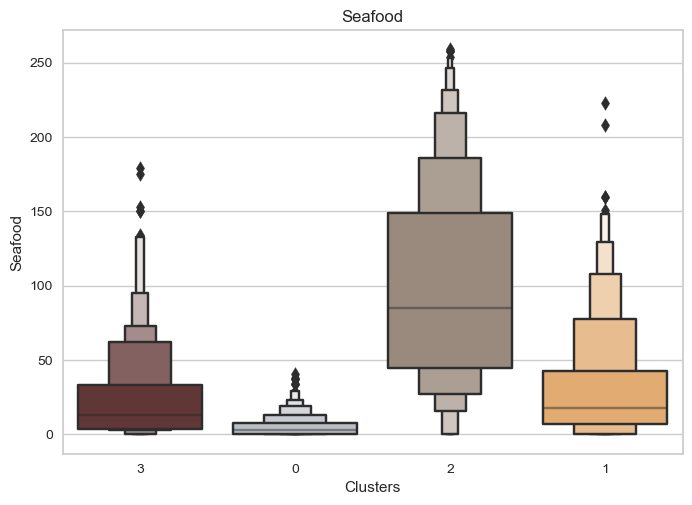

In [48]:
#Plotting Seafood
plt.figure()
pl=sns.boxenplot(y=new_data["Seafood"],x=new_data["Clusters"], palette= pal)
pl.set_title("Seafood")
plt.show()

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

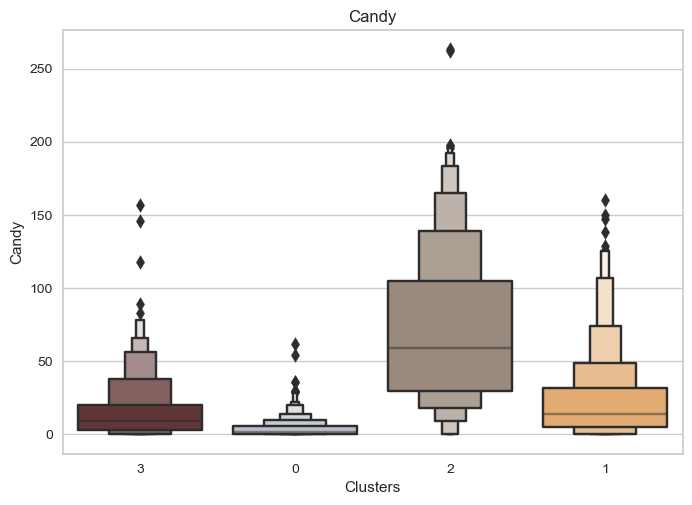

In [49]:
#Plotting Seafood
plt.figure()
pl=sns.boxenplot(y=new_data["Candy"],x=new_data["Clusters"], palette= pal)
pl.set_title("Candy")
plt.show()

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

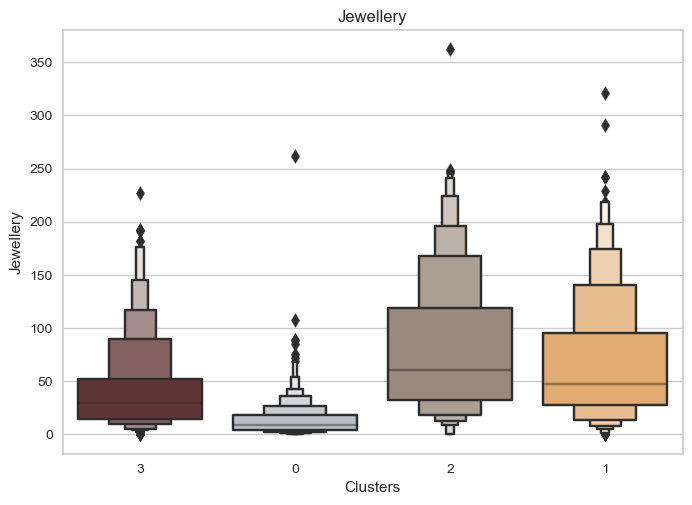

In [50]:
#Plotting Seafood
plt.figure()
pl=sns.boxenplot(y=new_data["Jewellery"],x=new_data["Clusters"], palette= pal)
pl.set_title("Jewellery")
plt.show()

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

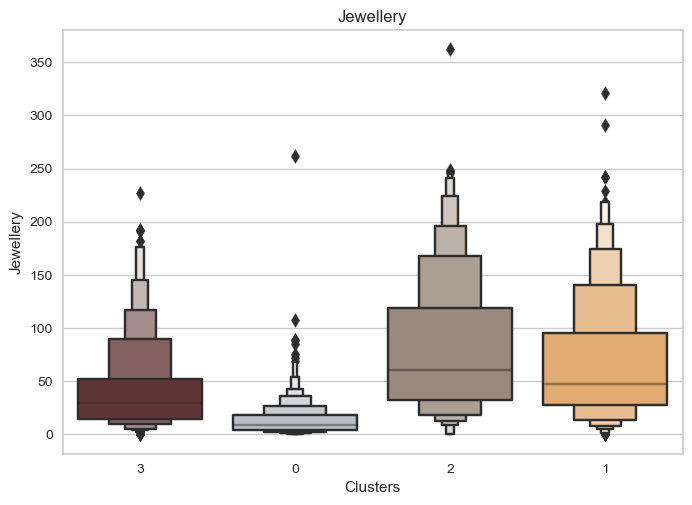

In [51]:
#Plotting Jewellery
plt.figure()
pl=sns.boxenplot(y=new_data["Jewellery"],x=new_data["Clusters"], palette= pal)
pl.set_title("Jewellery")
plt.show()

It can be referred from the 5 charts above that customers from 'Class 2' has a significantly higher purchase capacity comparing to the other classes, and most the times 'Class 0' has the lowest rate of purchase. The only exception to this, however, is in 'Liquor' where 'Class 1' purchase capability seems to be on par with 'Class 2'

## 7.3. Analysis on Customer Buying Tendency

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

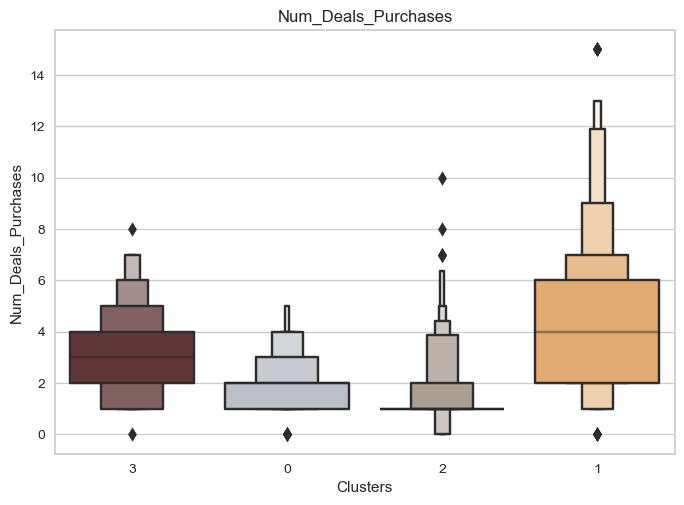

In [52]:
#Plotting Num_Deals_Purchases
plt.figure()
pl=sns.boxenplot(y=new_data["Num_Deals_Purchases"],x=new_data["Clusters"], palette= pal)
pl.set_title("Num_Deals_Purchases")
plt.show()

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

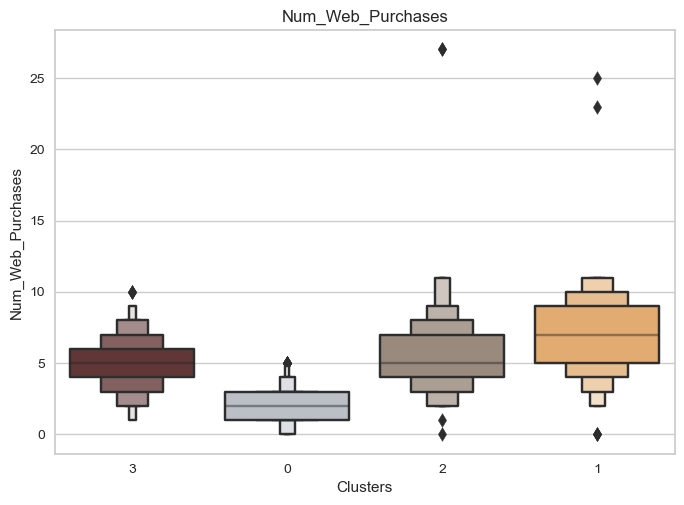

In [53]:
#Plotting Num_Web_Purchases
plt.figure()
pl=sns.boxenplot(y=new_data["Num_Web_Purchases"],x=new_data["Clusters"], palette= pal)
pl.set_title("Num_Web_Purchases")
plt.show()

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

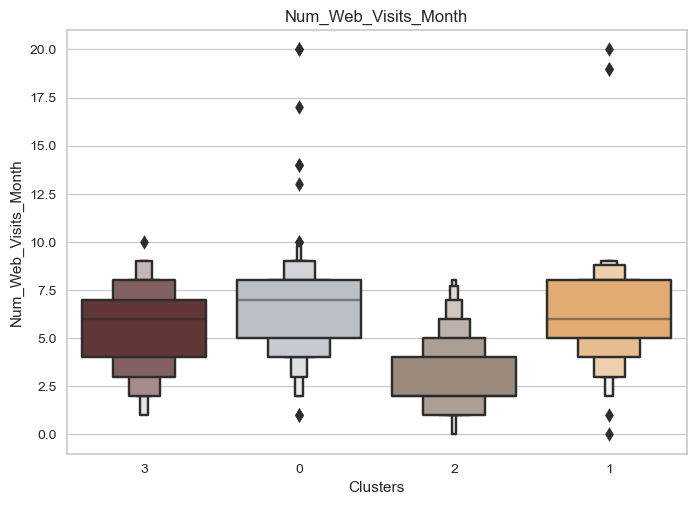

In [54]:
#Plotting Num_Web_Visits_Month
plt.figure()
pl=sns.boxenplot(y=new_data["Num_Web_Visits_Month"],x=new_data["Clusters"], palette= pal)
pl.set_title("Num_Web_Visits_Month")
plt.show()

**Summary**: Not so much variation in Num_Deals_Purchases, Num_Web_Purchases and Num_Web_Visit_Month across 4 Classes of data. Further examinations would be required in the remaining features before we can come to a concrete conclusion about the correlation between this column and the 4 classes.

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

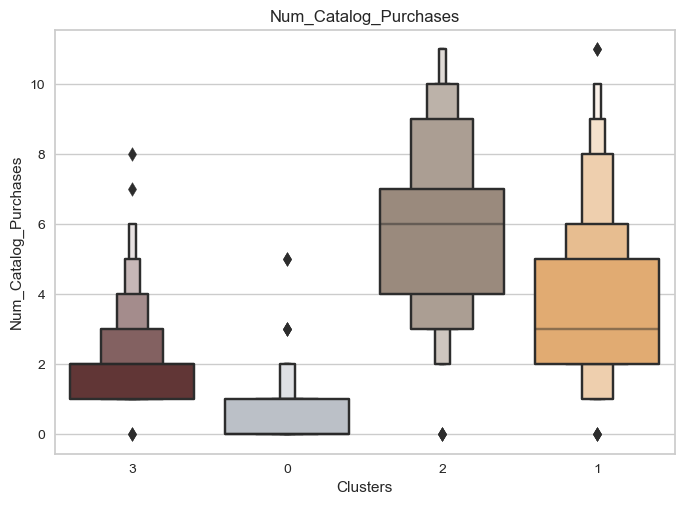

In [55]:
#Plotting Num_Catalog_Purchases
plt.figure()
pl=sns.boxenplot(y=new_data["Num_Catalog_Purchases"],x=new_data["Clusters"], palette= pal)
pl.set_title("Num_Catalog_Purchases")
plt.show()

**Summary**: There is a clear variance in Num_Catalog_Purchases throughout the 4 Classes. This indicates a different purchasing behavior for each of these classes with respect to buying from the catalog/

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

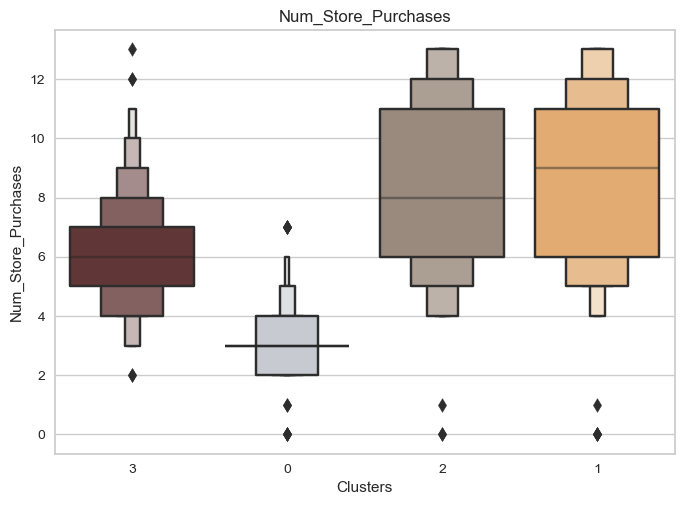

In [56]:
#Plotting Num_Store_Purchases
plt.figure()
pl=sns.boxenplot(y=new_data["Num_Store_Purchases"],x=new_data["Clusters"], palette= pal)
pl.set_title("Num_Store_Purchases")
plt.show()

**Summary**: While customer of Class 1 and 2 have similar tendency in buying at the store, customers from class 3 slighty deviates from, and also with customers from Class 0 significantly lower than the aforementioned classes.

## 7.4. Analysis on Customer Characteristics

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: us

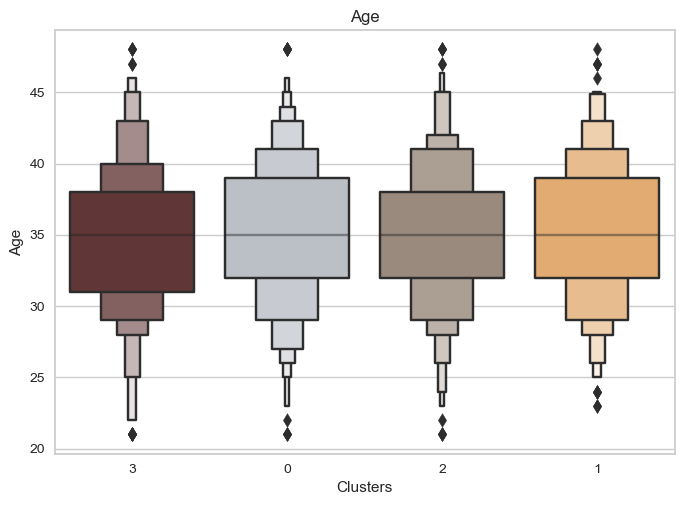

In [57]:
#Plotting the number of Age
plt.figure()
pl=sns.boxenplot(y=new_data["Age"],x=new_data["Clusters"], palette= pal)
pl.set_title("Age")
plt.show()

C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\scoop\apps\anaconda3\2024.02-1\App\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 84.6% of the points cannot be placed; you may want to d

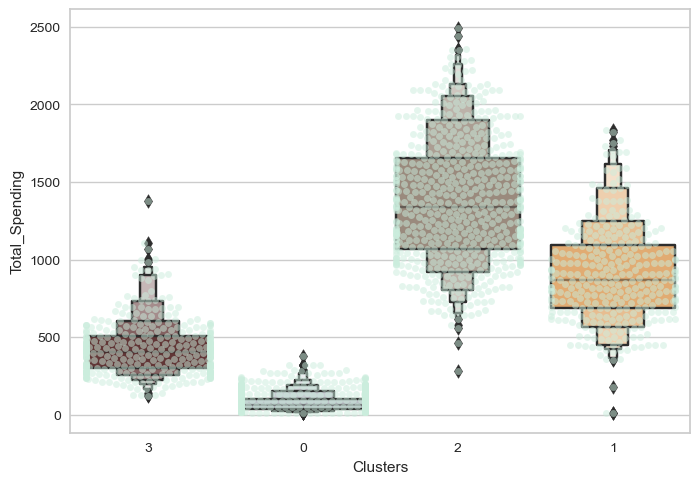

In [58]:
plt.figure()
pl=sns.swarmplot(x=new_data["Clusters"], y=new_data["Total_Spending"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=new_data["Clusters"], y=new_data["Total_Spending"], palette=pal)
plt.show()

To find the correlation, or more likely, the difference between buying behavior of customer from each Cluster with regard their personal characteristics, decided to store the Personal Attribute Columns of Customers inside an array. Using **JOINTPLOT**, we were able to visualize the relationship between each personal attribute and the Spending variable across different clusters.

In [ ]:
Personal = ['Marital_Status','Gender', 'Academic_Level']

In [ ]:
for i in Personal:
    plt.figure()
    sns.jointplot(x=new_data[i], y=new_data["Total_Spending"], hue=new_data["Clusters"], kind="kde", palette=pal)
    plt.show()

It can be depicted that most clustered data from our dataset belongs to 2 types or Marital Status, 3 Genders and 3 Academic Level. The variation of each clusterare depicted as follows:
- **Class 0**: Shows a weak Marital Status - Total Spending relationship, as their spending mostly are low and doesn't change according to the Marital Status. Similar Applies to Gender. A small anomaly can be seen from the correlation between Total_Spending and Academic_Level of the customers from Class 0, in which it indicates a lower spending capability from people with higher academic level, and this also was the only group with highly academic customers. This indicates that this group are the **calculated buyers**.
- **Class 1 and 3**: These classes bear a similar description to that of Class 1, the correlation betwwen each classes' features to the Total_Spending stays consistent, and with one higher than another (Class 1 figures are higher than Class 3).
- **Class 2**: Bear significantly higher spending capacity comparing to the other 3 classes regardless of personal status. This class would be the **High End User**, the group of user with high spending tendency.

In [ ]:
for i in Personal:
    plt.figure()
    sns.jointplot(x=new_data[i], y=new_data["Income"], hue =new_data["Clusters"], kind="kde", palette=pal)
    plt.show()

It can be depicted that most clustered data from our dataset belongs to 2 types or Marital Status, 3 Genders and 3 Academic Level. The variation of each clusterare depicted as follows:
- **Class 0**: Shows Marital Status - Income correlation quite negatively, as the Income for 'Married' customers is quite sparse, indicating a more limited income status for them. Similar Applies to Gender. A small anomaly can be seen in Academic_Level of the customers from Class 0, in which it indicates a lower income level from customers with higher academic level, and this also was the only group with highly academic customers.
- **Class 1, 3 and 2**: These classes bear a similar description to that of Class 1, the correlation betwwen each classes' features to the Total_Spending stays consistent, and with one higher than another (Class 2 > Class 1 > Class 3).

# 8. Conclusive Remarks

**Summary of Customer Segments**

After thorough research into each customer segment and their unique characteristics, the team has decided to divide them into four main customer segments:

1. **Cluster 0 (Transient):** This group consists of customers with low income. They make few purchases and have low spending habits, often with low educational levels. They do not shop much at any location and typically browse the web casually. They do not tend to be attached to any specific shopping channel, usually engaging only in occasional small transactions. Therefore, they are labeled as the Transient group.

2. **Cluster 1 (Loyal):** Comprising customers with high income, frequent transactions, and high total spending, this group is willing to shop at any location and does not prefer shopping through catalogs. They also browse the web frequently but do not prioritize any specific shopping channel other than being ready to shop anywhere when needed. Therefore, they are labeled as the Loyal group.

3. **Cluster 2 (Important):** These customers have very high income, conduct many transactions, and have very high total spending. They are the highest spenders across many locations, although they do not favor shopping online as much. They browse the web less and tend to focus on traditional and direct shopping channels. Therefore, they are labeled as the Important group.

4. **Cluster 3 (Potential):** This group consists of customers with average income, average transactions, and average total spending. They are interested in promotions and good deals. They have a neutral attitude towards shopping locations, no clear preference for any channel, and frequently browse the web. Therefore, they are labeled as the Potential group.

After analyzing the information provided through customer segmentation, the business will have additional insights to optimize marketing strategies and services, enhance personalized interactions, and improve customer experience. Additionally, the business may consider focusing investment on the Loyal and Important groups to increase customer retention rates.
